In [1]:
import numpy
from matplotlib import pyplot, animation
import matplotlib.cm as cm
from IPython.display import HTML
%matplotlib inline

#### Gray-Scott Model

$$
\frac{\partial u}{\partial t} = D_u \nabla ^2 u - uv^2 + F(1-u)
$$

$$
\frac{\partial v}{\partial t} = D_v \nabla ^2 v + uv^2 - (F + k)v
$$

$$
2V+U\rightarrow 3V
$$

In [14]:
# constants, copied from openedx

n = 192
#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
#Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # fingerprint
Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050
dh = 5./(n-1)
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)

In [15]:
# initial value arrays

uvinitial = numpy.load('./data/uvinitial.npz')
U_init = uvinitial['U']
V_init = uvinitial['V']

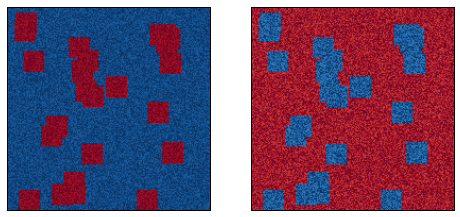

In [16]:
# plot initial U & V

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U_init, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V_init, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [17]:
def ftcs(U, V, dt, dx, dy, nt, F, k, Du, Dv):
    
    Ut = numpy.zeros((nt, *U.shape))
    for n in range(nt):

        Un = U.copy()
        Vn = V.copy()

        U[1:-1,1:-1] = (Un[1:-1,1:-1]
                      + Du * (dt/dx**2 * (Un[2:,1:-1] - 2*Un[1:-1,1:-1] + Un[:-2,1:-1])
                            + dt/dy**2 * (Un[1:-1,2:] - 2*Un[1:-1,1:-1] + Un[1:-1,:-2]))
                      - dt * Un[1:-1,1:-1] * Vn[1:-1,1:-1]**2 
                      + dt * F * (1-Un[1:-1,1:-1]) )

        V[1:-1,1:-1] = (Vn[1:-1,1:-1] 
                      + Dv * (dt/dx**2 * (Vn[2:,1:-1] - 2*Vn[1:-1,1:-1] + Vn[:-2,1:-1])
                            + dt/dy**2 * (Vn[1:-1,2:] - 2*Vn[1:-1,1:-1] + Vn[1:-1,:-2]))
                      + dt * Un[1:-1,1:-1] * Vn[1:-1,1:-1]**2 
                      - dt * (F+k) * Vn[1:-1,1:-1] )

        # Neumann BCs
        U[0,:] = U[1,:]
        U[-1,:] = U[-2,:]
        U[:,0] = U[:,1]
        U[:,-1] = U[:,-2]

        V[0,:] = V[1,:]
        V[-1,:] = V[-2,:]
        V[:,0] = V[:,1]
        V[:,-1] = V[:,-2]
        
        Ut[n] = U.copy()
    
    return Ut

In [18]:
Ut = ftcs(U_init.copy(), V_init.copy(), 
          dt, dh, dh, nt, F, k, Du, Dv)

In [19]:
# print result
# print(Ut[-1,100,::40].round(4))

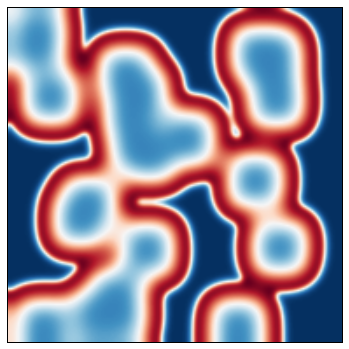

In [22]:
fig = pyplot.figure(figsize=(8,6))
pyplot.xticks([]), pyplot.yticks([]);

im = pyplot.imshow(Ut[100], cmap=cm.RdBu)

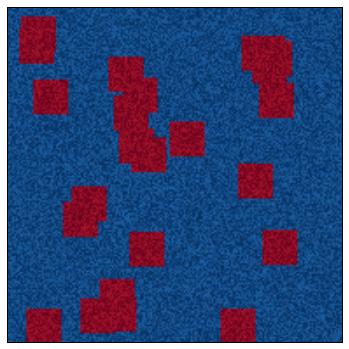

In [8]:
# set up animation frame
fig = pyplot.figure(figsize=(8,6))
pyplot.xticks([]), pyplot.yticks([]);

im = pyplot.imshow(U_init, cmap=cm.RdBu)

In [9]:
def init():
    im.set_data(U_init)
    return im,

In [11]:
def animate(data):
    im.set_array(data)
    return im,

In [12]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Ut, interval=1)

In [13]:
HTML(anim.to_html5_video())